# Prep set

In [1]:
import pandas as pd
import ast

In [2]:
data="data_half_month"
with open(data, 'r') as r:
    res=pd.DataFrame()
    for x in r:
        # json module doesn't work here - not valid JSON provided
        line=pd.DataFrame([ast.literal_eval(x)])
        res=res.append(line)

In [3]:
row=(dict(res[['business']].reset_index(drop=True).iterrows())[0])
for x in row:
    print(x)


{'business_id': 'Aabr0G7IrxI03NhbsH5FDA', 'name': "Gold's Gym", 'neighborhood': '', 'address': '2805 W Centennial Pkwy', 'city': 'North Las Vegas', 'state': 'NV', 'postal_code': '89084', 'latitude': 36.2760401, 'longitude': -115.1791359, 'stars': 3.0, 'review_count': 29, 'is_open': 0, 'attributes': {'GoodForKids': True}, 'categories': ['Active Life', 'Fitness & Instruction', 'Gyms'], 'hours': {}}


In [4]:
res.count()

business     12763
cool         12763
date         12763
funny        12763
review_id    12763
stars        12763
text         12763
useful       12763
user_id      12763
dtype: int64

In [5]:
res.groupby('cool').count()

,business,date,funny,review_id,stars,text,useful,user_id
cool,,,,,,,,
0,8391,8391,8391,8391,8391,8391,8391,8391
1,2633,2633,2633,2633,2633,2633,2633,2633
2,846,846,846,846,846,846,846,846
3,383,383,383,383,383,383,383,383
4,183,183,183,183,183,183,183,183
5,100,100,100,100,100,100,100,100
6,63,63,63,63,63,63,63,63
7,45,45,45,45,45,45,45,45
8,35,35,35,35,35,35,35,35


In [6]:
res.groupby('useful').count()

,business,cool,date,funny,review_id,stars,text,user_id
useful,,,,,,,,
0,4292,4292,4292,4292,4292,4292,4292,4292
1,3377,3377,3377,3377,3377,3377,3377,3377
2,1902,1902,1902,1902,1902,1902,1902,1902
3,1102,1102,1102,1102,1102,1102,1102,1102
4,643,643,643,643,643,643,643,643
5,407,407,407,407,407,407,407,407
6,261,261,261,261,261,261,261,261
7,177,177,177,177,177,177,177,177
8,148,148,148,148,148,148,148,148


In [7]:
res.groupby('funny').count()

,business,cool,date,review_id,stars,text,useful,user_id
funny,,,,,,,,
0,8762,8762,8762,8762,8762,8762,8762,8762
1,2243,2243,2243,2243,2243,2243,2243,2243
2,792,792,792,792,792,792,792,792
3,348,348,348,348,348,348,348,348
4,194,194,194,194,194,194,194,194
5,118,118,118,118,118,118,118,118
6,88,88,88,88,88,88,88,88
7,48,48,48,48,48,48,48,48
8,44,44,44,44,44,44,44,44


In [8]:
def get_reviews(like_type):
    pos=res[res[like_type]>0].sample(n=1000).copy()
    pos['classification']=like_type
    neg=res[res[like_type]==0].sample(n=1000).copy()
    neg['classification']='not-'+like_type
    all=pd.concat([pos, neg])
    all=all[['text', like_type, 'classification', 'stars', 'business']].reset_index(drop=True)
    return all

# Classification

In [9]:
import nltk
toker=nltk.tokenize.TweetTokenizer()

In [10]:
like_type='useful'
#like_type='funny'
#like_type='cool'

In [11]:
reviews=get_reviews(like_type)

total number of words: 286011
unique words: 16360
words present only once: 8332


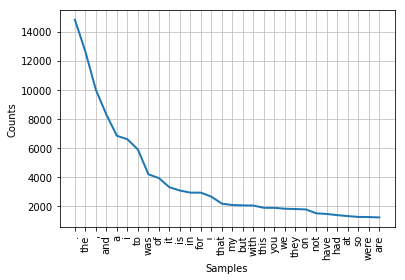

In [14]:
texts_tokenized = (toker.tokenize(row.text) for index, row in reviews.iterrows())
all_words = nltk.FreqDist(w.lower() for tokens in texts_tokenized for w in tokens)

print('total number of words:', sum(all_words.values()))
print('unique words:', len(all_words))
print('words present only once:', sum(c for c in all_words.values() if c == 1))

all_words.plot(30)

feature words: 7990


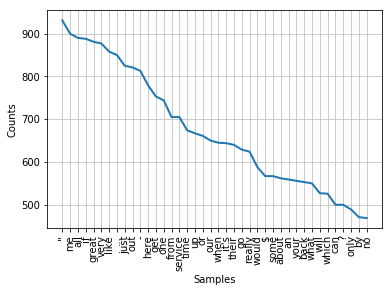

In [15]:
words = all_words.copy()
for w, count in all_words.items():
    if count > 1000 or count == 1:
        del words[w]

print('feature words:', len(words))
words.plot(40)

In [16]:
word_features = frozenset(words.keys())

def features(row):
    text=row.text
    txt_words = set(toker.tokenize(text.lower()))
    features = {}
    for w in txt_words & word_features:
        #features['contains({})'.format(w)] = 'Yes' # beze slov je to lepsi
        pass
    
    text=toker.tokenize(text.lower())
    for w,w2 in zip(text[:-1], text[1:]):
        if w in word_features and w2 in word_features:
                features['contains({}&&&{})'.format(w,w2)] = 'Yes'
                
    #features['contains(@@stars{})'.format(row.stars)] = 'Yes'
    features['@@@stars'] = row.stars
    features['@@@bus_stars']=row['business']['stars']
    features['@@@review_count']= "A lot" if row['business']['review_count']  else "A few"
    return features

In [17]:
# generate tuples: (features_dict, sentiment)
feature_sets = [(features(row), row.classification) for index, row in reviews.iterrows()]

In [18]:
feature_sets[0]

({'contains(little&&&intimidated)': 'Yes',
  'contains(intimidated&&&by)': 'Yes',
  'contains(let&&&me)': 'Yes',
  'contains(me&&&say)': 'Yes',
  'contains(say&&&..)': 'Yes',
  'contains(gf&&&here)': 'Yes',
  'contains(her&&&birthday)': 'Yes',
  'contains(made&&&reservations)': 'Yes',
  'contains(inside&&&tip)': 'Yes',
  'contains(tell&&&them)': 'Yes',
  'contains(them&&&ahead)': 'Yes',
  'contains(will&&&make)': 'Yes',
  'contains(special&&&gift)': 'Yes',
  'contains(made&&&from)': 'Yes',
  'contains(from&&&various)': 'Yes',
  'contains(various&&&vegetables)': 'Yes',
  'contains(pretty&&&awesome)': 'Yes',
  'contains(awesome&&&skills)': 'Yes',
  'contains(people&&&sitting)': 'Yes',
  'contains(sitting&&&beside)': 'Yes',
  'contains(beside&&&us)': 'Yes',
  'contains(us&&&got)': 'Yes',
  'contains(show&&&them)': 'Yes',
  'contains(them&&&proof)': 'Yes',
  'contains(proof&&&first)': 'Yes',
  'contains(first&&&though)': 'Yes',
  'contains(though&&&..)': 'Yes',
  'contains(..&&&anyways)': 

# Model training

In [19]:
    import random
    random.shuffle(feature_sets)
    train_set, test_set = feature_sets[:1000], feature_sets[1000:]
    len(feature_sets)

2000

In [20]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [21]:
print(nltk.classify.accuracy(classifier, test_set))

0.544


In [22]:
classifier.show_most_informative_features(30)

Most Informative Features
         contains($&&&5) = 'Yes'          useful : not-us =      7.0 : 1.0
  contains(don't&&&want) = 'Yes'          useful : not-us =      6.3 : 1.0
   contains(much&&&more) = 'Yes'          useful : not-us =      6.3 : 1.0
contains(would&&&definitely) = 'Yes'          not-us : useful =      6.3 : 1.0
    contains(next&&&day) = 'Yes'          useful : not-us =      6.3 : 1.0
     contains(gave&&&me) = 'Yes'          useful : not-us =      6.3 : 1.0
 contains(didn't&&&want) = 'Yes'          useful : not-us =      5.7 : 1.0
   contains(5&&&minutes) = 'Yes'          useful : not-us =      5.0 : 1.0
 contains(didn't&&&even) = 'Yes'          useful : not-us =      5.0 : 1.0
    contains(when&&&i'm) = 'Yes'          not-us : useful =      5.0 : 1.0
     contains(right&&&?) = 'Yes'          useful : not-us =      5.0 : 1.0
contains(super&&&friendly) = 'Yes'          useful : not-us =      5.0 : 1.0
  contains(your&&&order) = 'Yes'          useful : not-us =      4.3

In [23]:
# import pickle

#with open('sentiment_classifier.pickle', 'wb') as f:
 #   pickle.dump(classifier, f)

In [24]:
#train('useful')

In [25]:
classifier = nltk.DecisionTreeClassifier.train(train_set)

In [26]:
print(nltk.classify.accuracy(classifier, test_set))

0.532


In [27]:
classifier.pseudocode() #tohle nefunguje --- proc???

TypeError: '<' not supported between instances of 'str' and 'NoneType'